In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.under_sampling import NearMiss
from keras.models import load_model, Model
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, multilabel_confusion_matrix, ConfusionMatrixDisplay

num_epochs = 100

data = pd.read_csv("/Users/Cristian/Documents/EPN/Maestría en Computación/OneDrive - Escuela Politécnica Nacional/2022-B/Tesis/Dataset/20221215_151443_clustering.csv")
#data = pd.read_csv("F:/EPN/Maestría en Computación/OneDrive - Escuela Politécnica Nacional/2022-B/Tesis/Dataset/20221215_151443_clustering.csv")

df = data.loc[:, ['steering_angle', 'speed', 'rpm', 'acceleration', 'throttle_position', 'engine_temperature', 'system_voltage', 'barometric_pressure',
    'distance_travelled', 'latitude', 'longitude', 'heart_rate', 'accidents_onsite', 'risk_level']]

le = LabelEncoder()
df['risk_level']= le.fit_transform(df['risk_level'])

n = len(pd.unique(df['risk_level']))

X = df.iloc[:,0:13]
Y = df.iloc[:,-1:]

undersample = NearMiss(version = 1, n_neighbors = 4)
X_res, Y_res = undersample.fit_resample(X, Y)

scaler = StandardScaler()
X = scaler.fit_transform(X_res)
Y = Y_res

# **Recover CNN model**

In [2]:

model = load_model("/Users/Cristian/Documents/EPN/Maestría en Computación/OneDrive - Escuela Politécnica Nacional/2022-B/Tesis/Script/Models/CNN-model1-ep"+ str(num_epochs) + ".keras", compile=False)

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 10, 32)            128       
                                                                 
 conv1d_1 (Conv1D)           (None, 8, 128)            12416     
                                                                 
 max_pooling1d (MaxPooling1  (None, 8, 128)            0         
 D)                                                              
                                                                 
 conv1d_2 (Conv1D)           (None, 6, 64)             24640     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 6, 64)             0         
 g1D)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 4, 128)            2

In [4]:
choseen_layer = model.get_layer('conv1d_4')
extraction_model = Model(inputs = model.input, outputs = choseen_layer.output)
extracted_features = extraction_model.predict(X)

60/60 [==============================] - 0s 3ms/step


In [5]:
X_train_ext = extracted_features.reshape(extracted_features.shape[0], -1)
Y = np.array(Y)

# **Hyperparameter Tuning**

In [6]:
param_grid = {'n_estimators': [50, 100, 150, 200, 250, 300, 500],
              'max_depth': [1, 5, 10, 15, 20]}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
grid = GridSearchCV(rf, param_grid, cv = 5)

# Fit the random search object to the data
grid.fit(X_train_ext, Y.flatten())

# Print the best hyperparameters
print(
	"Best parameters are {} \nScore: {}%".format(
		grid.best_params_, grid.best_score_)
)

Best parameters are {'max_depth': 15, 'n_estimators': 50} 
Score: 0.9453125%


# **Random Forest Implementation**

In [9]:
rf_model = RandomForestClassifier(max_depth = 15, n_estimators = 50, random_state = 0)

# **Cross Validation**

In [10]:
num_folds = 5
X = np.array(X)
Y = np.array(Y)

# Define per-fold score containers
acc_per_fold = []
specifity_per_fold = []
sensivity_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits = num_folds, shuffle = True)

------------------------------------------------------------------------
Training for fold 1 ...

              precision    recall  f1-score   support

     Class 0       1.00      0.99      0.99        89
     Class 1       0.99      0.94      0.96        94
     Class 2       0.93      0.99      0.96       105
     Class 3       0.96      0.95      0.95        96

    accuracy                           0.97       384
   macro avg       0.97      0.97      0.97       384
weighted avg       0.97      0.97      0.97       384


Score for fold 1: - Accuracy: 0.9661458333333334 - Specifity: 0.9884972500308985 - Sensivity: 0.9658317787131586


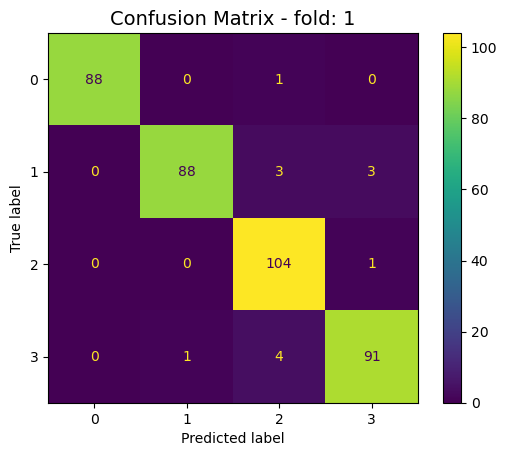

------------------------------------------------------------------------
Training for fold 2 ...

              precision    recall  f1-score   support

     Class 0       0.99      1.00      0.99        86
     Class 1       0.95      0.96      0.95       109
     Class 2       0.94      0.92      0.93        98
     Class 3       0.92      0.91      0.92        91

    accuracy                           0.95       384
   macro avg       0.95      0.95      0.95       384
weighted avg       0.95      0.95      0.95       384


Score for fold 2: - Accuracy: 0.9479166666666666 - Specifity: 0.9824890768804688 - Sensivity: 0.9484395028300664


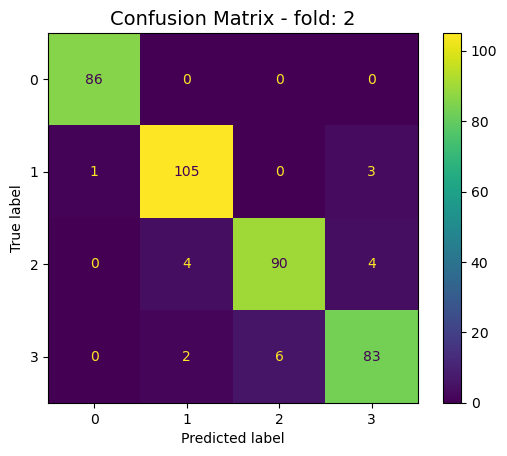

------------------------------------------------------------------------
Training for fold 3 ...

              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99       104
     Class 1       0.94      0.96      0.95        96
     Class 2       0.97      0.96      0.97        80
     Class 3       0.97      0.96      0.97       104

    accuracy                           0.97       384
   macro avg       0.97      0.97      0.97       384
weighted avg       0.97      0.97      0.97       384


Score for fold 3: - Accuracy: 0.96875 - Specifity: 0.9895755012531328 - Sensivity: 0.9681891025641026


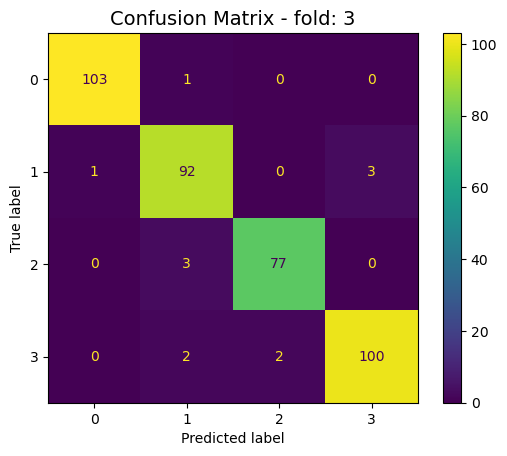

------------------------------------------------------------------------
Training for fold 4 ...

              precision    recall  f1-score   support

     Class 0       1.00      0.98      0.99        99
     Class 1       0.93      0.98      0.95        91
     Class 2       0.99      0.92      0.96       105
     Class 3       0.92      0.97      0.95        89

    accuracy                           0.96       384
   macro avg       0.96      0.96      0.96       384
weighted avg       0.96      0.96      0.96       384


Score for fold 4: - Accuracy: 0.9609375 - Specifity: 0.9871990430167654 - Sensivity: 0.9619804041152356


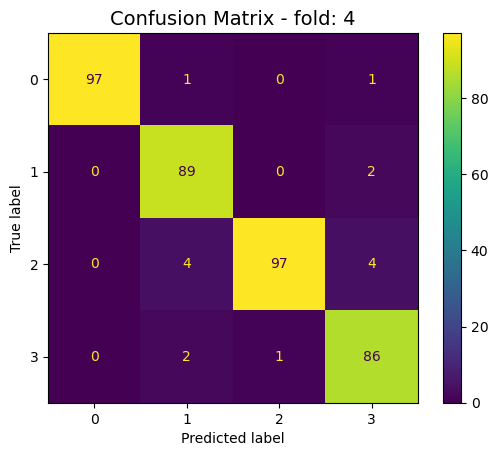

------------------------------------------------------------------------
Training for fold 5 ...

              precision    recall  f1-score   support

     Class 0       0.99      0.97      0.98       102
     Class 1       0.92      0.93      0.93        90
     Class 2       0.98      0.95      0.96        92
     Class 3       0.94      0.98      0.96       100

    accuracy                           0.96       384
   macro avg       0.96      0.96      0.96       384
weighted avg       0.96      0.96      0.96       384


Score for fold 5: - Accuracy: 0.9583333333333334 - Specifity: 0.9861670753169558 - Sensivity: 0.9573934356351236


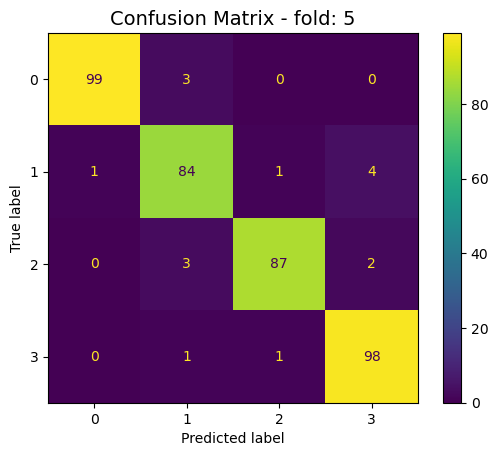

In [11]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X, Y):
    
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...\n')

    # Fit data to model
    rf_model.fit(X[train], Y[train].flatten())
    
    # Predict the labels of test set
    y_pred = rf_model.predict(X[test])

    target_names = ["Class {}".format(i) for i in range(n)]
    print(classification_report(Y[test], y_pred, target_names = target_names, zero_division = 0))

    # Confusion Matrix
    mcm = multilabel_confusion_matrix(Y[test], y_pred)

    tn = mcm[:, 0, 0]
    tp = mcm[:, 1, 1]
    fn = mcm[:, 1, 0]
    fp = mcm[:, 0, 1]

    specifity = np.mean(tn / (tn + fp))
    sensivity = np.mean(tp / (tp + fn))

    # Generate generalization metrics of evaluation
    scores = rf_model.score(X[test], Y[test])
    print(f'\nScore for fold {fold_no}: - Accuracy: {scores} - Specifity: {specifity} - Sensivity: {sensivity}')

    # Plot Confusion Matrix of each fold
    ConfusionMatrixDisplay.from_predictions(Y[test], y_pred)
    plt.title(f'Confusion Matrix - fold: {fold_no}', fontsize = 14)
    plt.show()
    
    acc_per_fold.append(scores)
    specifity_per_fold.append(specifity)
    sensivity_per_fold.append(sensivity)

    # Increase fold number
    fold_no = fold_no + 1

# **Resume Evaluation Metric scores**

In [12]:
# == Provide average scores ==
print('Resume scores per fold')
for i in range(0, num_folds):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Accuracy: {acc_per_fold[i]} - Specificity: {specifity_per_fold[i]} - Sensitivity: {sensivity_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)}')
print(f'> Specificity: {np.mean(specifity_per_fold)}')
print(f'> Sensitivity: {np.mean(sensivity_per_fold)}')

Resume scores per fold
------------------------------------------------------------------------
> Fold 1 - Accuracy: 0.9661458333333334 - Specificity: 0.9884972500308985 - Sensitivity: 0.9658317787131586
------------------------------------------------------------------------
> Fold 2 - Accuracy: 0.9479166666666666 - Specificity: 0.9824890768804688 - Sensitivity: 0.9484395028300664
------------------------------------------------------------------------
> Fold 3 - Accuracy: 0.96875 - Specificity: 0.9895755012531328 - Sensitivity: 0.9681891025641026
------------------------------------------------------------------------
> Fold 4 - Accuracy: 0.9609375 - Specificity: 0.9871990430167654 - Sensitivity: 0.9619804041152356
------------------------------------------------------------------------
> Fold 5 - Accuracy: 0.9583333333333334 - Specificity: 0.9861670753169558 - Sensitivity: 0.9573934356351236
------------------------------------------------------------------------
Average scores for 